In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime
import time
import seaborn as sns
import calendar
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd.set_option('display.max_rows', None)

In [76]:
df = pd.read_csv('data/cleaned_aggregated.csv')

In [77]:
df = df.sort_values(by="month")

In [78]:
df.head()

,sn,command,date,crash_time,report_time,arrival_time,response_time,route,location,vehicle_no,...,no_involved_female_adult,no_involved_male_child,no_involved_female_child,total_involved,month,day,year,report_minus_crash,arrival_minus_crash,arrival_minus_report
436,1,RS11.23,2018-01-03,14:47:00,14:52:00,14:58:00,6.0,IKR - OWO,KM 16 ETIORO,AKR 946 TE & KAA 241 VX,...,0.0,0.0,1.0,4.0,1,3,2018,300,660,360
114,1,RS11.2,2017-01-05,09:30:00,09:35:00,09:50:00,15.0,AKR - OWO,KM 20 OGBESE,KTU B151 BP & CM 175 RSH,...,0.0,0.0,0.0,7.0,1,5,2017,300,1200,900
501,3,RS11.21,2019-01-19,13:31:00,13:32:00,13:34:00,2.0,ORE - LAG,KM5,XB 585 AKD & NO NOS,...,0.0,0.0,0.0,2.0,1,19,2019,60,180,120
502,4,RS11.21,2019-01-24,11:59:00,12:13:00,12:03:00,4.0,ORE - LAG,KM25,ACA 636 XT & XA 336 EKY,...,7.0,0.0,0.0,15.0,1,24,2019,840,240,-600
505,3,RS11.22,2019-01-17,09:00:00,09:05:00,09:15:00,10.0,OWO - IFON,AFTER ITA IPELE VILLAGE 13KM FROM IKARE JUNCTION,NO NOS,...,0.0,0.0,0.0,2.0,1,17,2019,300,900,600


In [79]:
df['month_name'] = pd.to_datetime(df['date']).dt.month_name()

In [80]:
df['day_name'] = pd.to_datetime(df['date']).dt.day_name()

In [64]:
df.columns

Index(['sn', 'command', 'date', 'crash_time', 'report_time', 'arrival_time',
       'response_time', 'route', 'location', 'vehicle_no', 'vehicle_type',
       'vehicle_cat', 'vehicle_make', 'vehicle_model', 'fleet_operator',
       'name_of_driver', 'dl_no', 'causes', 'no_injured_male_adult',
       'no_injured_female_adult', 'no_injured_male_child',
       'no_injured_female_child', 'total_injured', 'no_killed_male_adult',
       'no_killed_female_adult', 'no_killed_male_child',
       'no_killed_female_child', 'total_killed', 'no_involved_male_adult',
       'no_involved_female_adult', 'no_involved_male_child',
       'no_involved_female_child', 'total_involved', 'month', 'day', 'year',
       'report_minus_crash', 'arrival_minus_crash', 'arrival_minus_report',
       'month_name', 'day_name'],
      dtype='object')

In [81]:
df

,sn,command,date,crash_time,report_time,arrival_time,response_time,route,location,vehicle_no,...,no_involved_female_child,total_involved,month,day,year,report_minus_crash,arrival_minus_crash,arrival_minus_report,month_name,day_name
436,1,RS11.23,2018-01-03,14:47:00,14:52:00,14:58:00,6.0,IKR - OWO,KM 16 ETIORO,AKR 946 TE & KAA 241 VX,...,1.0,4.0,1,3,2018,300,660,360,January,Wednesday
114,1,RS11.2,2017-01-05,09:30:00,09:35:00,09:50:00,15.0,AKR - OWO,KM 20 OGBESE,KTU B151 BP & CM 175 RSH,...,0.0,7.0,1,5,2017,300,1200,900,January,Thursday
501,3,RS11.21,2019-01-19,13:31:00,13:32:00,13:34:00,2.0,ORE - LAG,KM5,XB 585 AKD & NO NOS,...,0.0,2.0,1,19,2019,60,180,120,January,Saturday
502,4,RS11.21,2019-01-24,11:59:00,12:13:00,12:03:00,4.0,ORE - LAG,KM25,ACA 636 XT & XA 336 EKY,...,0.0,15.0,1,24,2019,840,240,-600,January,Thursday
505,3,RS11.22,2019-01-17,09:00:00,09:05:00,09:15:00,10.0,OWO - IFON,AFTER ITA IPELE VILLAGE 13KM FROM IKARE JUNCTION,NO NOS,...,0.0,2.0,1,17,2019,300,900,600,January,Thursday
506,4,RS11.22,2019-01-18,11:32:00,11:33:00,11:34:00,1.0,OWO - IKR,KM 2 IKR JUNCTN.,WWW 039 QV,...,0.0,2.0,1,18,2019,60,120,60,January,Friday
507,5,RS11.22,2019-01-20,08:07:00,08:10:00,08:14:00,4.0,OWO - AKR,TISCO FARM 9KM FROM IKARE JUNCTION,NO NOS,...,0.0,3.0,1,20,2019,180,420,240,January,Sunday
508,6,RS11.22,2019-01-22,10:10:00,10:13:00,10:17:00,4.0,OWO - AKR,POLY SECOND GATE 7KM FROM IKARE JUNCTION,KAK 713 XA,...,0.0,3.0,1,22,2019,180,420,240,January,Tuesday
498,6,RS11.2,2019-01-23,19:40:00,19:41:00,19:48:00,7.0,AKR & IPT,50 M BY A& T,AF 908 AKR & XM 939 AKR,...,0.0,2.0,1,23,2019,60,480,420,January,Wednesday
509,7,RS11.22,2019-01-22,12:25:00,12:27:00,12:32:00,5.0,OWO - AKR,EMURE AFTER SECOND MARKET 12.5KM FROM IKARE JU...,IDE 18 AA,...,0.0,14.0,1,22,2019,120,420,300,January,Tuesday


In [86]:
# Series
df.groupby(df['month_name']).count().date

month_name
April         78
August       104
December      75
February      80
January       56
July          71
June          82
March         74
May           80
November      57
October       52
September     65
Name: date, dtype: int64

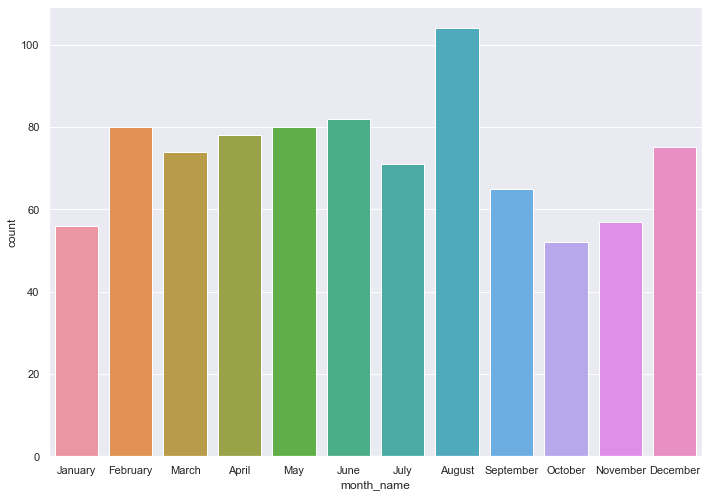

In [93]:
ax = sns.countplot(data=df, x='month_name')

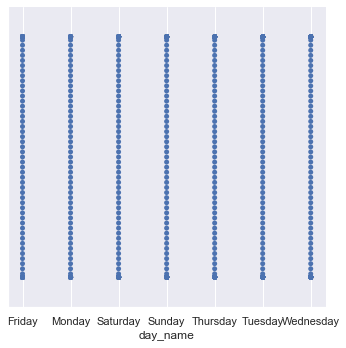

In [94]:
sns.catplot(x="day_name", kind="swarm", data=df)

In [63]:
df1

,sn,command,date,crash_time,report_time,arrival_time,response_time,route,location,vehicle_no,...,no_involved_female_child,total_involved,month,day,year,report_minus_crash,arrival_minus_crash,arrival_minus_report,month_name,day_name
January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
February,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
March,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
April,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
June,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
July,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
